In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

- 그래프 전역설정

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

- Bar plot

In [3]:
origin = pd.read_excel("grade.xlsx", index_col = "이름")
origin

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
영호,4,남자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,1,남자,91,90,89,80


- 학년별 평균 데이터 구하기

In [4]:
df = origin.drop('성별', axis = 1).groupby('학년', as_index = False).mean()
df

,학년,국어,영어,수학,과학
0,1,92.75,82.25,85.25,79.5
1,2,85.00,104.00,70.50,81.0
2,3,63.00,60.00,31.00,71.0
3,4,77.50,69.00,90.50,80.0


- 그래프에 적용 가능한 형태는 'list', 'tuple', 'ndarray', 'series' 모두 가능

In [5]:
y = list(df['국어'])
x = list(range(0, len(y)))
x, y

([0, 1, 2, 3], [92.75, 85.0, 63.0, 77.5])

- 리스트 내포 (함축식)

In [6]:
xticks = [f"{i}학년" for i in df['학년']]
xticks

['1학년', '2학년', '3학년', '4학년']

- 그래프 생성
  - plt.bar(x, y)
  - x : x축 데이터
  - y : y축 데이터

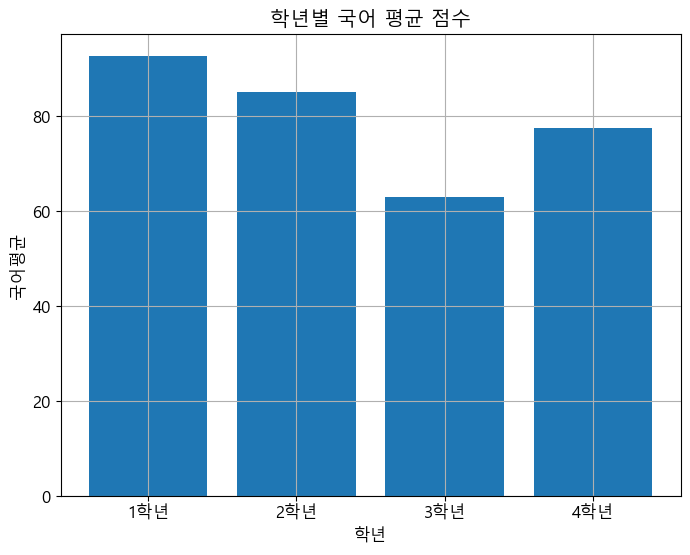

In [7]:
plt.figure()
plt.title("학년별 국어 평균 점수")
plt.bar(x, y)
plt.xlabel("학년")
plt.ylabel("국어평균")
plt.xticks(x, xticks)
plt.grid()
plt.show()
plt.close()

- 색상 지정 (단색)

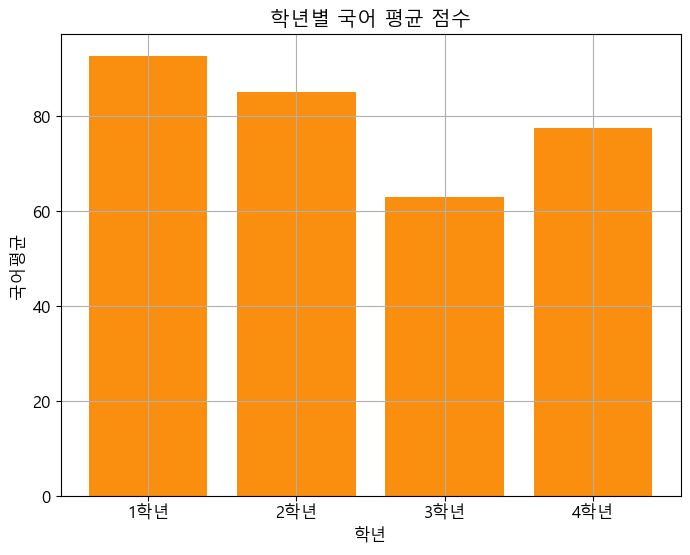

In [8]:
plt.figure()
plt.title("학년별 국어 평균 점수")
plt.bar(x, y, color = "#FA8E0E")
plt.xlabel("학년")
plt.ylabel("국어평균")
plt.xticks(x, xticks)
plt.grid()
plt.show()
plt.close()

- 막대별 색상 지정
  - color 파라미터의 값을 리스트 형태로 지정
  - 리스트의 원소는 색상값을 의미하며, 막대의 수 만큼 원소를 가짐

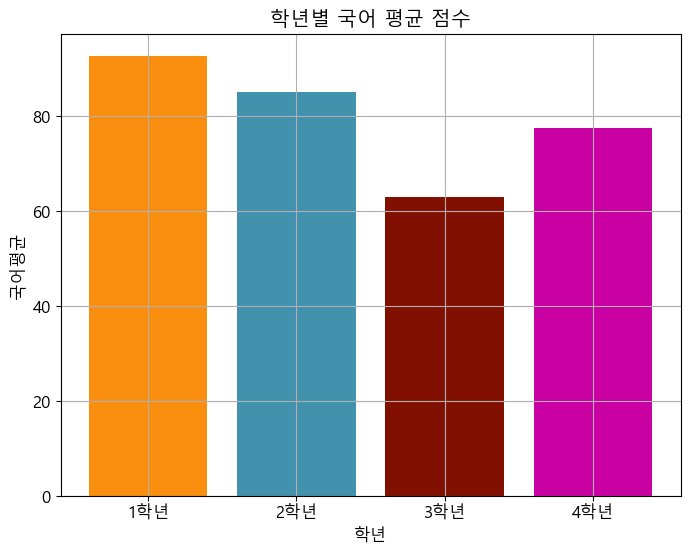

In [9]:
plt.figure()
plt.title("학년별 국어 평균 점수")
plt.bar(x, y, color = ["#FA8E0E", "#4292AE", "#821000", "#CA01A2"])
plt.xlabel("학년")
plt.ylabel("국어평균")
plt.xticks(x, xticks)
plt.grid()
plt.show()
plt.close()

- 가로 막대 그래프
  - barh(y, x)

In [10]:
x_h, y_h = y.copy(), x.copy()
yticks_h = xticks.copy()

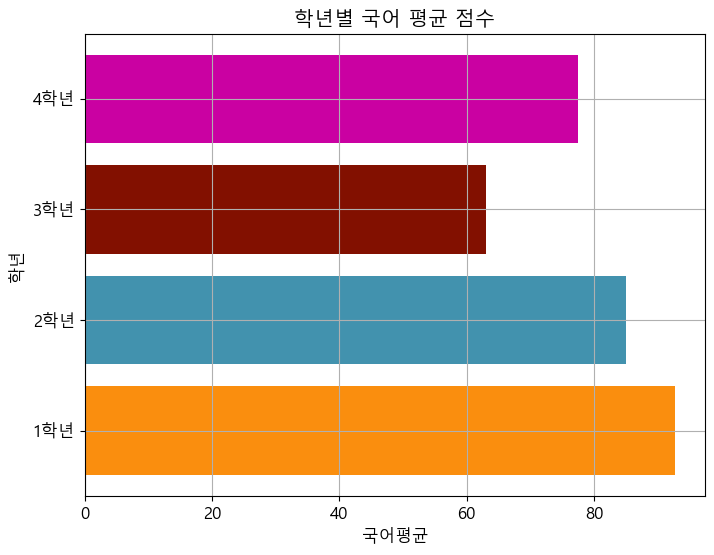

In [11]:
plt.figure()
plt.title("학년별 국어 평균 점수")
plt.barh(y_h, x_h, color = ["#FA8E0E", "#4292AE", "#821000", "#CA01A2"])
plt.ylabel("학년")
plt.xlabel("국어평균")
plt.yticks(y_h, yticks_h)
plt.grid()
plt.show()
plt.close()

- 다중 막대 그래프
  - 다중 막대 그래프는 x축을 좌표값(숫자)을 원소로 갖는 ndarray로 처리하는것이 유리함
    - ndarray는 숫자형 데이터를 더하고 빼는것이 쉽기 때문
  - 각 막대의 넓이('width')를 지정하고 각 막대를 넓이의 1/2씩 앞뒤로 이동시켜야 함
    - width 파라미터는 0부터 1사이의 값을 가짐

In [12]:
y1 = list(df['국어'])
y2 = list(df['영어'])
x = np.arange(0, len(y1))
xticks = [f"{i}학년" for i in df['학년']]
x, y1, y2, xticks

(array([0, 1, 2, 3]),
 [92.75, 85.0, 63.0, 77.5],
 [82.25, 104.0, 60.0, 69.0],
 ['1학년', '2학년', '3학년', '4학년'])

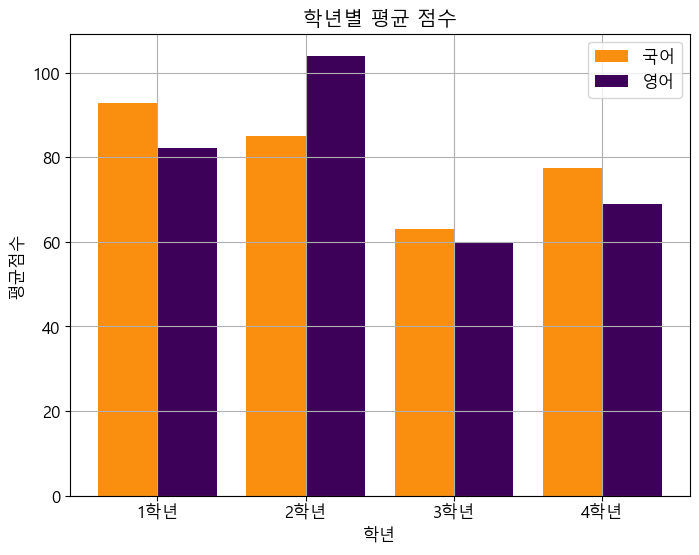

In [13]:
plt.figure()
plt.title("학년별 평균 점수")
plt.bar(x - 0.2, y1, color = "#FA8E0E", label = "국어", width = 0.4)
plt.bar(x + 0.2, y2, color = "#3E0159", label = "영어", width = 0.4)
plt.xlabel("학년")
plt.ylabel("평균점수")
plt.xticks(x, xticks)
plt.grid()
plt.legend()
plt.show()
plt.close()

- 가로 다중 막대 그래프
  - 세로에서는 width였던 것이 가로에서는 height로 지정함
  - y축으로 그래프를 이동시켜야 함

In [14]:
x1_h, x2_h, y_h = y1.copy(), y2.copy(), x.copy()
yticks_h = xticks.copy()

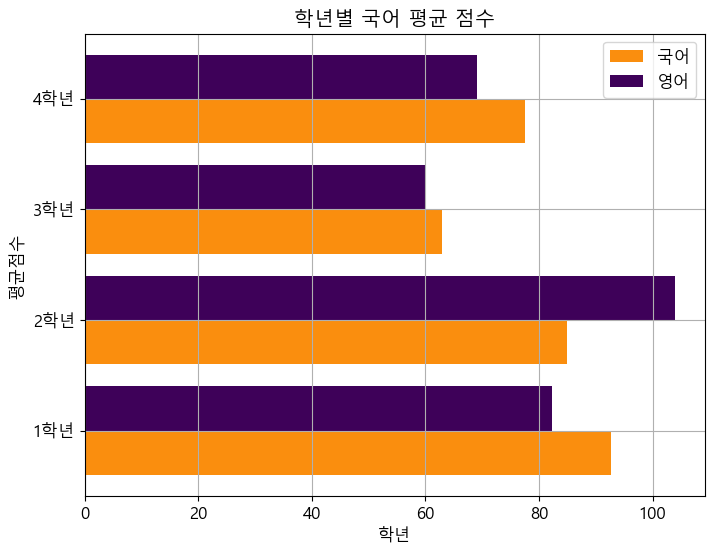

In [15]:
plt.figure()
plt.title("학년별 국어 평균 점수")
plt.barh(y_h - 0.2, x1_h, color = "#FA8E0E", label = "국어", height = 0.4)
plt.barh(y_h + 0.2, x2_h, color = "#3E0159", label = "영어", height = 0.4)
plt.xlabel("학년")
plt.ylabel("평균점수")
plt.yticks(y_h, yticks_h)
plt.grid()
plt.legend()
plt.savefig("multibarh.png", dpi = 200)
plt.show()
plt.close()

- 연구과제 1

In [16]:
df1 = pd.read_excel("covid19_active.xlsx")

In [17]:
df1.head()

,기준일,서울시 일일 확진,전국 일일 확진
0,2023-05-31,5987.0,24411.0
1,2023-05-30,3326.0,13529.0
2,2023-05-29,1393.0,6868.0
3,2023-05-28,1393.0,6868.0
4,2023-05-27,4078.0,17796.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기준일        396 non-null    datetime64[ns]
 1   서울시 일일 확진  395 non-null    float64       
 2   전국 일일 확진   395 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.4 KB


In [19]:
x = df1['기준일']
y1 = df1['서울시 일일 확진']
y2 = df1['전국 일일 확진']

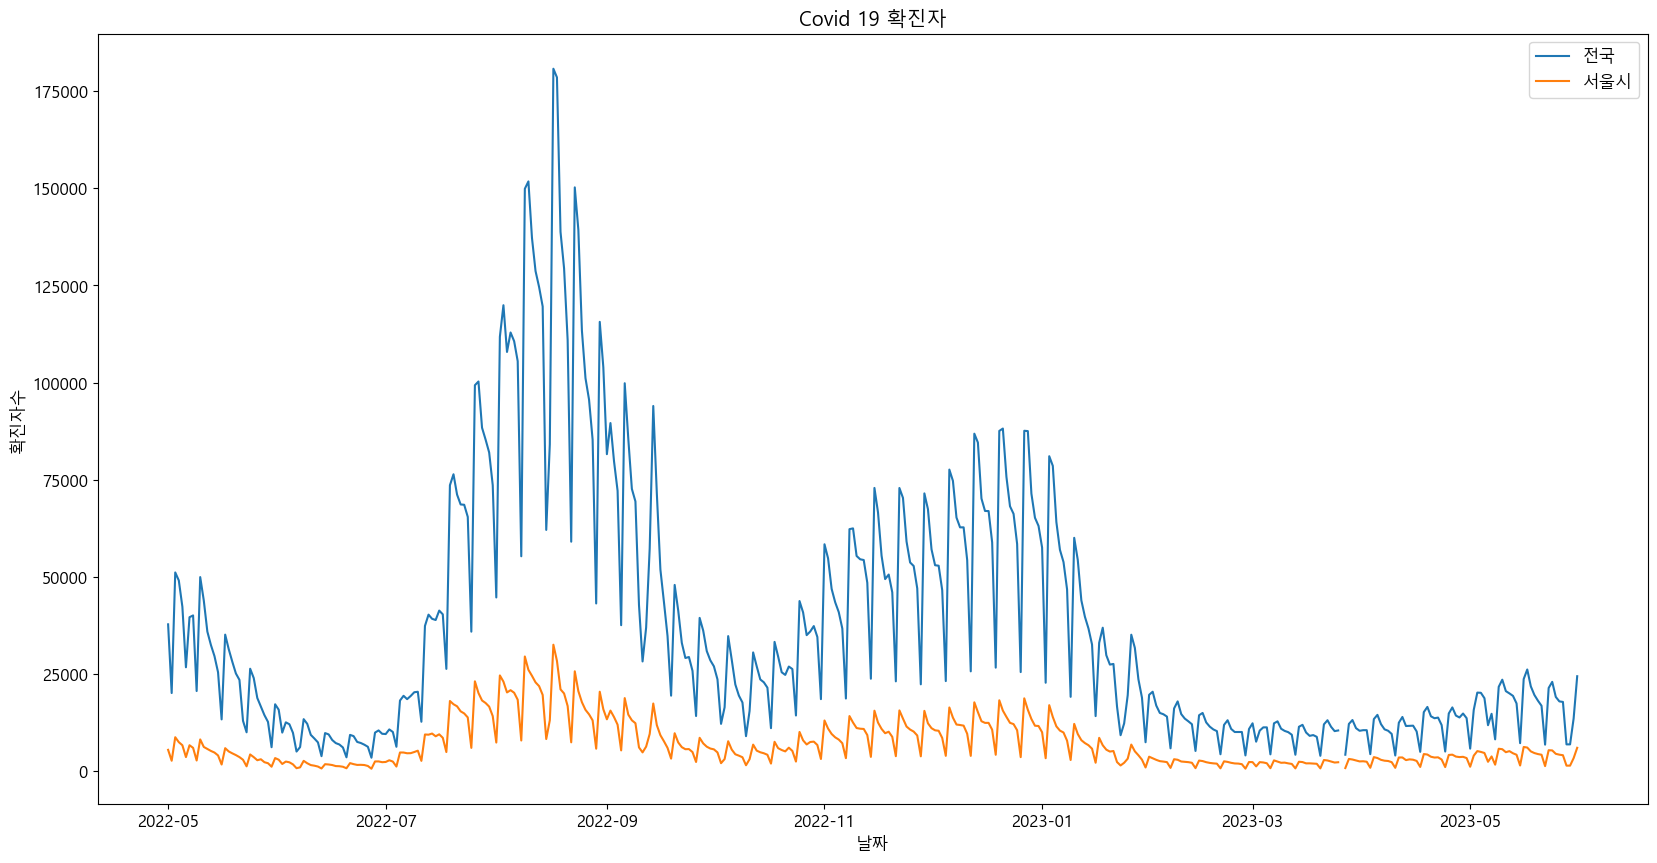

In [20]:
plt.figure(figsize = (20, 10))
plt.plot(x, y2, label = "전국")
plt.plot(x, y1, label = "서울시")
plt.title("Covid 19 확진자")
plt.xlabel("날짜")
plt.ylabel("확진자수")
plt.legend()
plt.savefig("1.png", dpi = 300)
plt.show()

- 연구과제 2

In [21]:
df2 = pd.read_excel("bitcoin.xlsx")
df2.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361


In [22]:
df2.shape

(760, 7)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      760 non-null    datetime64[ns]
 1   종가      760 non-null    float64       
 2   시가      760 non-null    float64       
 3   고가      760 non-null    float64       
 4   저가      760 non-null    float64       
 5   거래량     760 non-null    object        
 6   변동 %    760 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 41.7+ KB


In [44]:
x = df2['날짜']
xticks = df2['날짜'][::10]
y1 = df2['종가']
y2 = df2['시가']

In [25]:
xticks

0     2021-06-01
10    2021-06-11
20    2021-06-21
30    2021-07-01
40    2021-07-11
         ...    
710   2023-05-12
720   2023-05-22
730   2023-06-01
740   2023-06-11
750   2023-06-21
Name: 날짜, Length: 76, dtype: datetime64[ns]

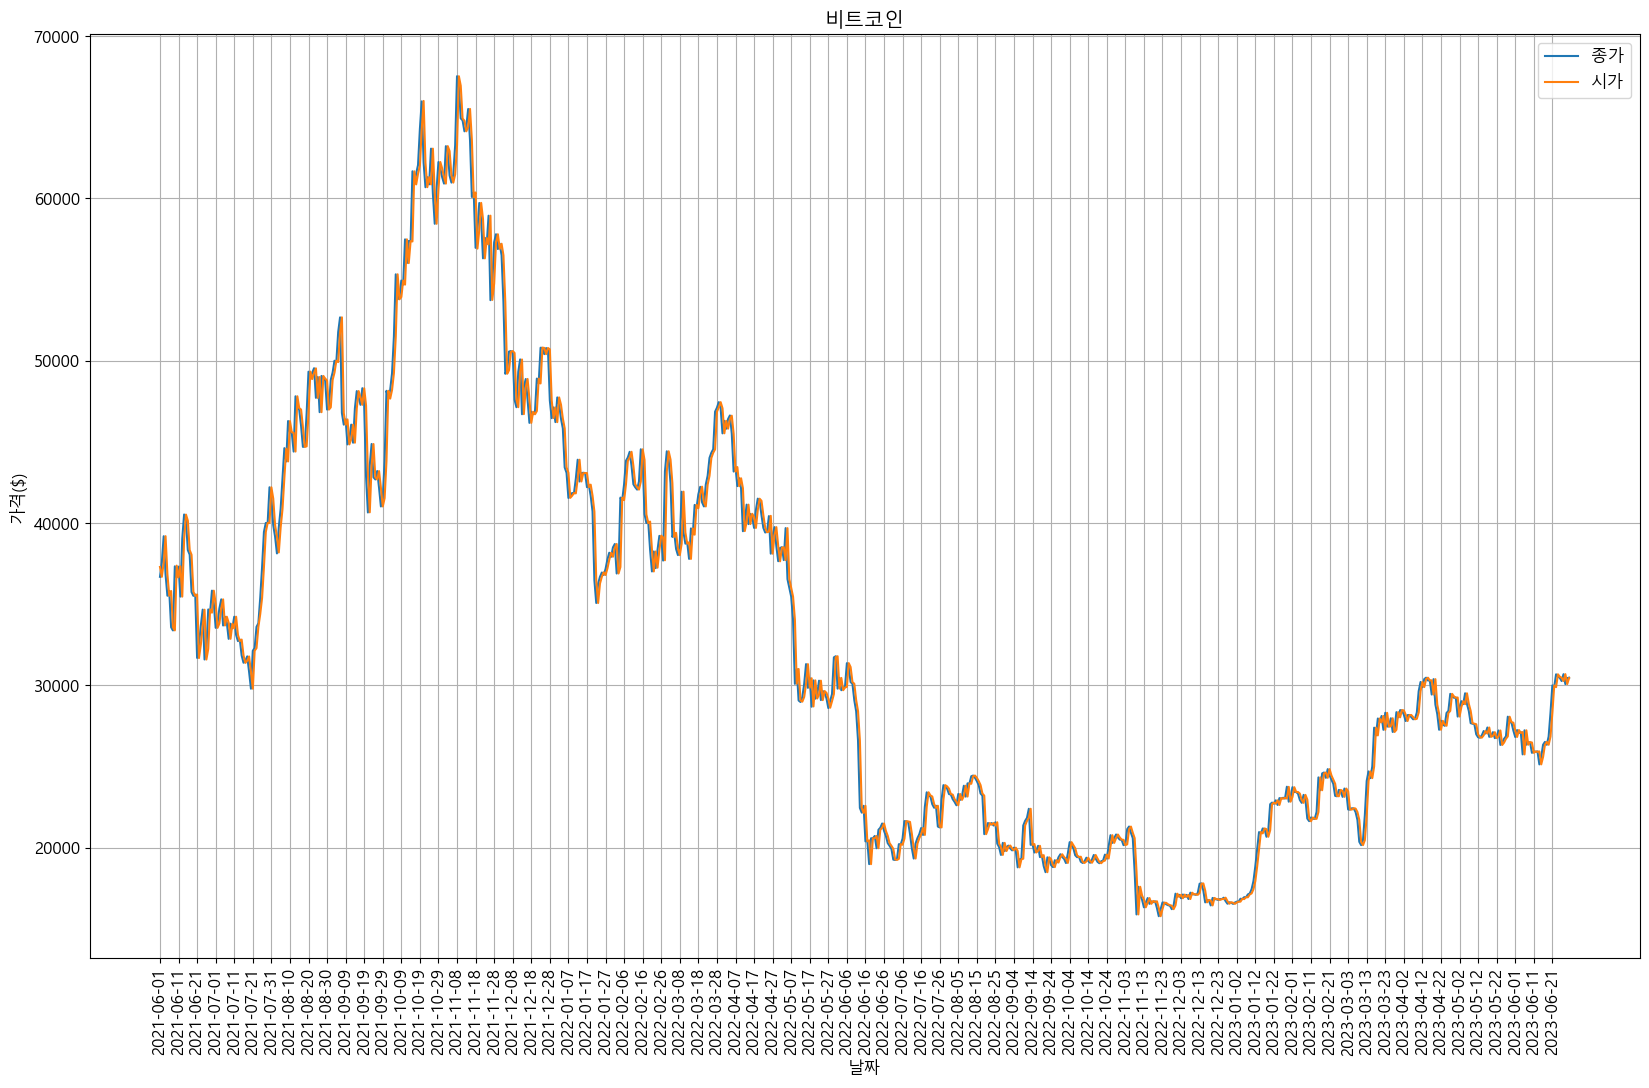

In [26]:
plt.figure(figsize = (20, 12))
plt.title("비트코인")
plt.xlabel("날짜")
plt.ylabel("가격($)")
plt.plot(x, y1, label = "종가")
plt.plot(x, y2, label = "시가")
plt.xticks(xticks, rotation = 90)
plt.grid()
plt.legend()
plt.savefig("2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 연구과제 3

In [27]:
df3 = pd.read_excel("senior_lsf.xlsx")

In [28]:
df3_1 = df3.sort_values("복지시설", ascending = False)[:10]

In [29]:
df3_1.reset_index(drop = True, inplace = True)

In [30]:
df3_1

,지역명,복지시설
0,Nowon-gu,252
1,Gangseo-gu,215
2,Yeongdeungpo-gu,208
3,Guro-gu,192
4,Yangcheon-gu,192
5,Gangnam-gu,184
6,Songpa-gu,173
7,Mapo-gu,160
8,Seongbuk-gu,158
9,Seongdong-gu,155


In [31]:
x = range(0, len(df3_1))
xticks = list(df3_1['지역명'])
y = df3_1['복지시설']

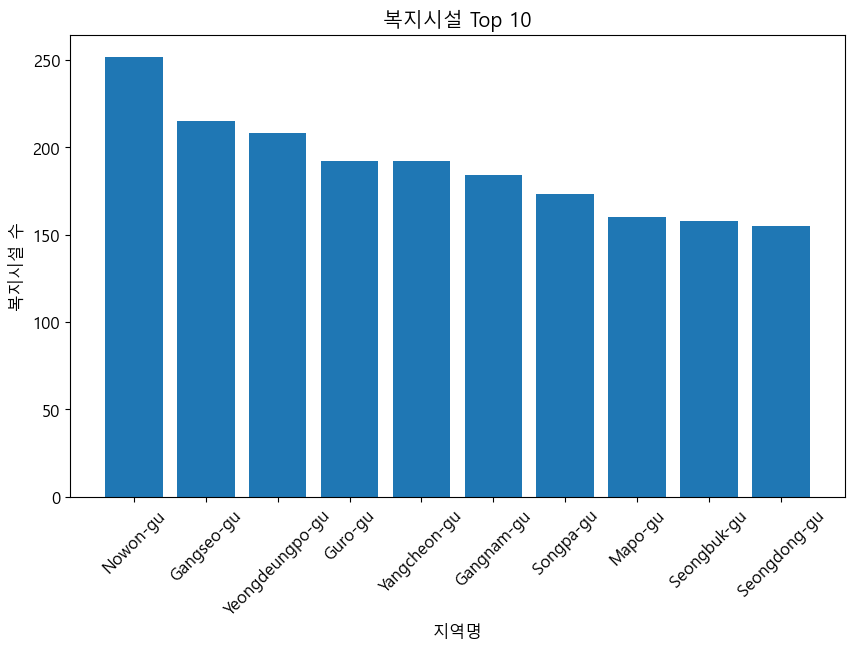

In [32]:
plt.figure(figsize = (10, 6))
plt.title("복지시설 Top 10")
plt.bar(x, y)
plt.xticks(x, xticks, rotation = 45)
plt.xlabel("지역명")
plt.ylabel("복지시설 수")
plt.savefig("3.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 연구과제 4

In [33]:
df4 = pd.read_excel("city_people.xlsx")

In [34]:
df4

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [35]:
df4_1 = df4[df4['연도'] == 2010]
df4_2 = df4[df4['연도'] == 2015]

In [36]:
df4_1

,도시,연도,인구,지역
1,서울,2010,9631482,수도권
4,부산,2010,3393191,경상권
7,인천,2010,2632035,수도권


In [37]:
df4_2

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
3,부산,2015,3448737,경상권
6,인천,2015,2890451,수도권


In [38]:
x = np.arange(0, len(df4_1))
xticks = df4_1['도시']
y1 = df4_1['인구']
y2 = df4_2['인구']

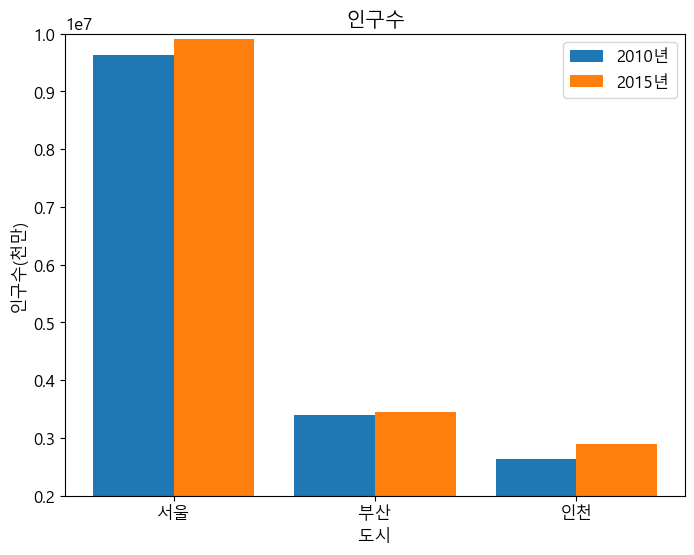

In [39]:
plt.figure()
plt.title("인구수")
plt.bar(x-0.2, y1, width = 0.4, label = "2010년")
plt.bar(x+0.2, y2, width = 0.4, label = "2015년")
plt.xticks(x, xticks)
plt.ylim(2000000, 10000000)
plt.xlabel("도시")
plt.ylabel("인구수(천만)")
plt.legend()
plt.savefig("4.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 연습문제 5

In [40]:
df5 = pd.read_excel("jobs_by_scale.xlsx")
df5.head()

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7


In [41]:
x = np.arange(0, len(df5))
xticks = df5['종사자규모별']
y1 = df5[2015]
y2 = df5[2016]

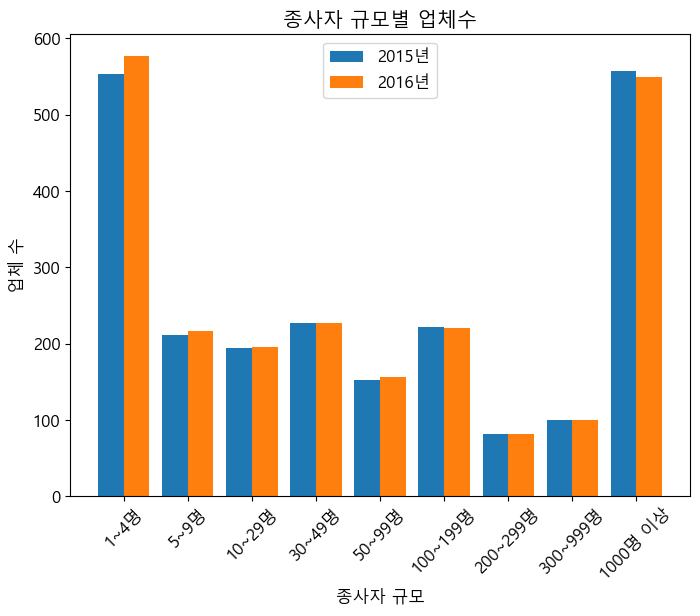

In [42]:
plt.figure(figsize = (8, 6))
plt.title("종사자 규모별 업체수")
plt.bar(x-0.2, y1, width = 0.4, label = "2015년")
plt.bar(x+0.2, y2, width = 0.4, label = "2016년")
plt.xticks(x, xticks, rotation = 45)
plt.xlabel("종사자 규모")
plt.ylabel("업체 수")
plt.legend()
plt.savefig("5.png", dpi = 300, bbox_inches = 'tight')
plt.show()